## Data processing by group BCA24-26
In this assignment we are taking penguines data set. We took this data ser from Kaggle website whuct contain numbers of data sets.
# Team member
1. Manoj Bhattarai
2. Nabin Yari
3. Sakshi 
4. Pravesh 
5. Prayusha Poudel
## Here in this data set we will do
 1. Data Preprocessing
 2. Data Objects and Attribute Types
 3. Basic Statistics
 4. Visualization

# 1. Data processing 


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Loading the data set 

In [5]:
penguin_data =  pd.read_csv("penguins.csv")

# Displaying  the first few rows of the dataset
penguin_data.head()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Explore the dataset by:
 1. Viewing random samples of data.
 2. Identifying the total number of rows and columns.

In [6]:
# using the .info() function to explor the basic information of the data
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
# using the .dtypes to know the data type of the datatype of the colums
penguin_data.dtypes

id                     int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [10]:
# identifying the total number of rows and columns
# penguin_data.columns
penguin_data.shape 
# penguin_data.values

(344, 9)

# Handle missing values by:
  1. Calculating the percentage of missing data.
  2. Deciding and implementing a method for handling missing values (e.g., filling or dropping).

In [8]:
missing_data = penguin_data.isnull().sum() / len(penguin_data) * 100
print(missing_data)
penguin_data.isnull().sum()


id                   0.000000
species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
year                 0.000000
dtype: float64


id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

# Filling the missing data with some values according the column data values

In [12]:
# filling the missing column of sex wth femle
penguin_data['sex'] = penguin_data['sex'].fillna('femle')

# filling the bill_length_mm column with it's average value
mean_data = penguin_data['bill_length_mm'].mean()
penguin_data['bill_length_mm'] = penguin_data['bill_length_mm'].fillna(mean_data)

# filling the bill_depth_mm colum withs it's average  value
average_data = penguin_data['bill_depth_mm'].mean()
penguin_data["bill_depth_mm"] = penguin_data['bill_depth_mm'].fillna(average_data)

# filling the flipper_length_mm column with it's average value
flipper_length_mm_average = penguin_data['flipper_length_mm'].mean()
penguin_data['flipper_length_mm'] = penguin_data['flipper_length_mm'].fillna(flipper_length_mm_average)

# filling the body_mass_g with it's mean value
mean_value = penguin_data['body_mass_g'].mean()
penguin_data['body_mass_g'] = penguin_data['body_mass_g'].fillna(mean_data)

# conforming the columns are still empty or not
penguin_data.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

# 2. Data Objects and Attribute Types
1. Nominal attributes
2. Binary attributes
3. Ordinal attributes


# Nominal attributes
Nominal attributes represent the data of different categories or groups without any specific order.

For example: 
City names - New York, Tokyo, Paris are just names of cities without a specific rank or other quality.

In [14]:
# penguin_data.select_dtypes(include=['object']).columns helps to Selects only the columns in penguin_data that have the data type 'object'
nominal_attributes_data = penguin_data.select_dtypes(include=['object']).columns
print("\nNominal attributes:")
print(nominal_attributes_data)


Nominal attributes:
Index(['species', 'island', 'sex'], dtype='object')


# Binary attributes 
This attributes has exactly two values either true or false or we can say 0 or 1.
  For example- sex there can be either male or female in penguin data set 


In [20]:
binary_attributes = [i for i in penguin_data.columns if penguin_data[i].nunique() == 2]
print("\nBinary attributes:")
print(binary_attributes)



Binary attributes:
['sex']


# Odinal attributes 
Ordinal attributes are categories that have a meaningful order or ranking, but the distance between the categories is not clear or consistent.

In [22]:
ordinal_attributes_data = penguin_data.select_dtypes(include=['float64', 'int64']).columns
print("\nOdinal attributes:")
print(ordinal_attributes_data)


Odinal attributes:
Index(['id', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'year'],
      dtype='object')


## 3. Basic Statistics
 # Use NumPy to perform fundamental statistical calculations, such as:

1. Mean (average)
2. Median
3. Standard Deviation
4. Variance
5. Minimum and Maximum values
6. Sum and Product of data

In [13]:
# Calculaing the mean(average) value
flipper_length_mm_mean = np.mean(penguin_data['flipper_length_mm'])
print("The mean value of flipper_length_mm is",flipper_length_mm_mean)

The mean value of flipper_length_mm is 200.91520467836258


In [14]:
# Calculating the median
median_body_mass_g = np.median(penguin_data['body_mass_g'])
print('The median value of the column is',median_body_mass_g)

The median value of the column is 4025.0


In [15]:
# caclulating the Standard devation 
std_data = np.std(penguin_data['bill_length_mm'])
print("The standard data of the bill_length_mm cloumn is",std_data)

The standard data of the bill_length_mm cloumn is 5.435725258705345


In [16]:
# Calculating the maximun and minimum value
min_data = np.min(penguin_data['bill_depth_mm'])
print("The minimum value of bill_depth_mm is",min_data)

max_data = np.max(penguin_data['bill_depth_mm'])
print("The maximum value of bill_depth_mm is", max_data)

The minimum value of bill_depth_mm is 13.1
The maximum value of bill_depth_mm is 21.5


In [17]:
#  Calculating the sum and the product value
sum_value = np.sum(penguin_data['bill_depth_mm'])
print("The sum of two column bill_depth_mm is",sum_value)

product_value = np.multiply(penguin_data['bill_depth_mm'], penguin_data['bill_length_mm'])
print("The product of two column bill_depth_mm and bill_length_mm.")
print(product_value)

The sum of two column bill_depth_mm is 5900.0023391812865
The product of two column bill_depth_mm and bill_length_mm.
0       731.170000
1       687.300000
2       725.400000
3       753.312467
4       708.310000
          ...     
339    1104.840000
340     787.350000
341     902.720000
342     965.200000
343     938.740000
Length: 344, dtype: float64


## 4. Visualization

Leverage Matplotlib to create various plots and charts as needed for analysis:

1. Line Plot
2. Scatter Plot
3. Bar Chart
4. Histogram
5. Pie Chart
6. Heatmap

# Importing the Matplotlib for various plot and charts

In [18]:
import matplotlib.pyplot as npl

# 1. Line Plot
  A line plot is used to visualize trends over a sequence (e.g., year, species, etc.).

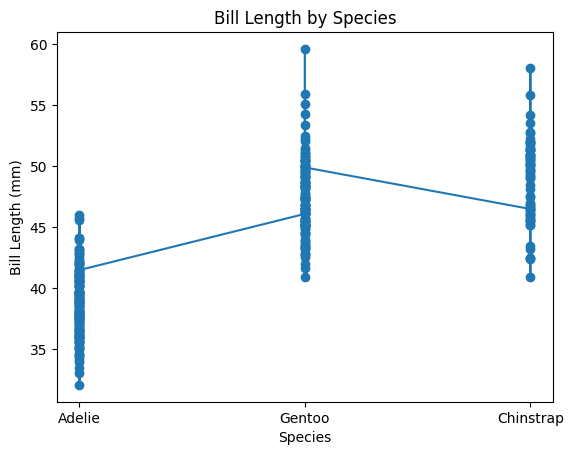

In [ ]:

npl.plot(penguin_data['species'],penguin_data['bill_length_mm'], marker= 'o', linestyle = '-')
npl.title('Bill Length by Species')
npl.xlabel('Species')
npl.ylabel('Bill Length (mm)')
npl.show()

# 2. Bar Chart
  A bar chart is used to compare categories (e.g., species and bill depth).

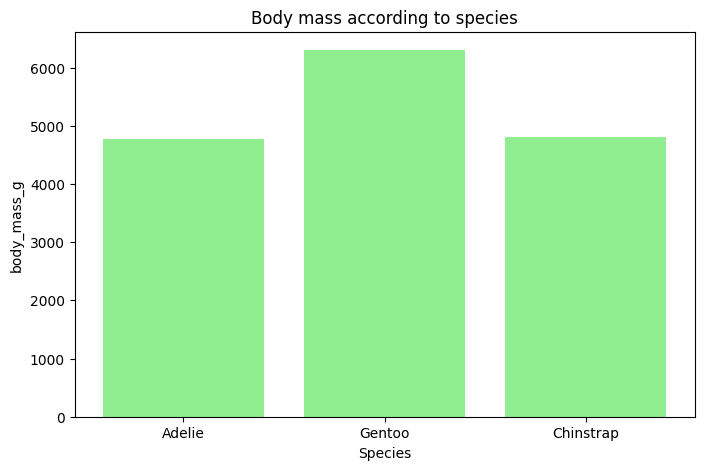

In [32]:
npl.figure(figsize=(8, 5))
npl.bar(penguin_data['species'], penguin_data['body_mass_g'], color=['lightgreen'])
npl.title('Body mass according to species')
npl.xlabel('Species')
npl.ylabel('body_mass_g')
npl.show()

# 3. Pie Chart
  A pie chart is used to show proportions.

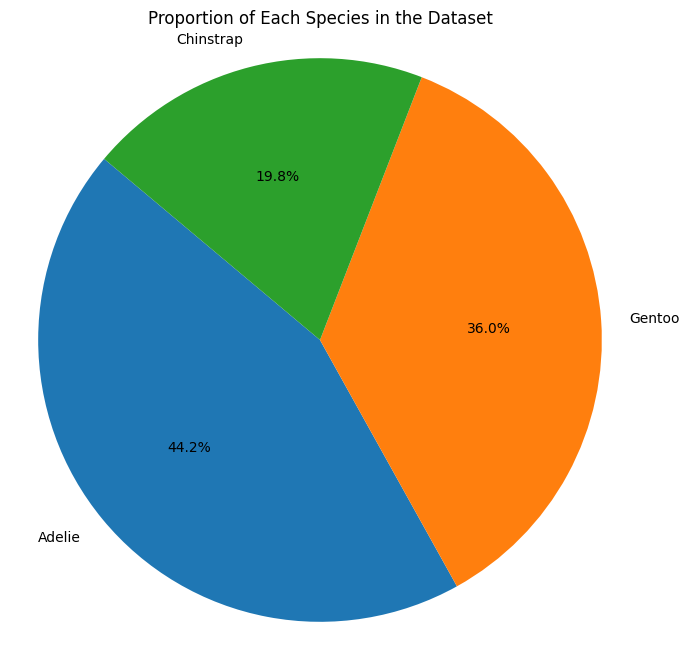

In [ ]:
species_nbr = penguin_data['species'].value_counts()  # Get counts for each species
target_names = species_nbr.index  # Extracts the unique species names
species_counts_values = species_nbr.values  #  Extracts the counts of each species from the species_counts

# Plot the pie chart
npl.figure(figsize=(8, 8))
npl.pie(species_counts_values,labels=target_names,autopct='%1.1f%%',startangle=140)
# autopct='%1.1f%%': Displays the percentage of each slice on the chart with one decimal place
# startangle=140: Rotates the pie chart so that the first slice starts at an angle of 140 degrees for better visual alignment.
npl.title('Proportion of Each Species in the Dataset')
npl.axis('equal')
npl.show()


Thank You!!

